In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings # para evitar que salgan adevertencias
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir("/Users/odela/Downloads")
cell_df= pd.read_csv("cell_samples.csv")
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
cell_df["Class"]=cell_df["Class"].replace([2],0) #tumor maligno
cell_df["Class"]=cell_df["Class"].replace([4],1) #tumor benigno
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


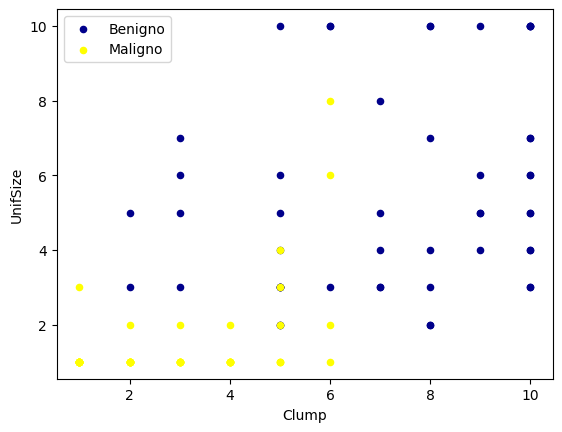

In [7]:
ax= cell_df[cell_df["Class"]==1][0:50].plot(kind="scatter", x="Clump", y= "UnifSize", color= "DarkBlue", label="Benigno");
ax= cell_df[cell_df["Class"]==0][0:50].plot(kind="scatter", x="Clump", y= "UnifSize", color= "yellow", label="Maligno", ax=ax)
plt.show()

In [8]:
ax= cell_df[cell_df["Class"]==1][0:50]
ax2= cell_df[cell_df["Class"]==0][0:50]

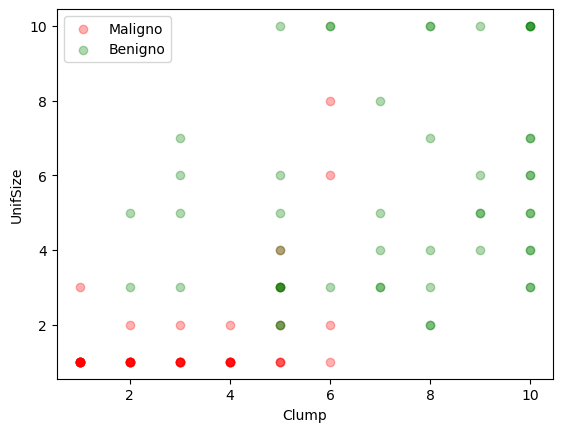

In [10]:
plt.scatter(ax2.Clump, ax2.UnifSize, color= "red", label= "Maligno", alpha=.3)
plt.scatter(ax.Clump, ax.UnifSize, color= "green", label= "Benigno", alpha=.3)
plt.xlabel("Clump")
plt.ylabel("UnifSize")
plt.legend()
plt.show()

In [12]:
# Preprocesamiento de datos y selección 

cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
# eliminación de renglones no numéricos en BareNuc

cell_df= cell_df[pd.to_numeric(cell_df["BareNuc"],errors= "coerce").notnull()]
cell_df["BareNuc"]= cell_df["BareNuc"].astype("int")
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [16]:
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [22]:
feature_df= cell_df.drop(["ID","Class"],axis=1)
x=np.asarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [28]:
cell_df["Class"]= cell_df["Class"].astype("int")
y=np.asarray(cell_df["Class"])
y[0:5]

array([0, 0, 0, 0, 0])

In [30]:
# Creación de grupo de entrenamiento y prueba

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.20, random_state=4)

In [32]:
print("Grupo de entrenamiento", x_train.shape, y_train.shape)
print("Grupo de prueba", x_test.shape, y_test.shape)

Grupo de entrenamiento (546, 9) (546,)
Grupo de prueba (137, 9) (137,)


# Modelación con SVM
Opciones de Kernel (transformaciones):

    1.-Linear
    2.-polynomial
    3.-radial basis function (RBF)
    4.-Sigmoid

In [36]:
# RBF
from sklearn import svm
clf= svm.SVC(kernel="rbf")
clf.fit(x_train, y_train)

SVC()

In [40]:
# Predicción para la base de prueba

yhat= clf.predict(x_test)
yhat[0:5]

array([0, 1, 0, 1, 0])

In [42]:
# Creación de matriz de confusión 

from sklearn.metrics import confusion_matrix
y_pred= clf.predict(x)
cm= confusion_matrix(y_test, yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [44]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [48]:
yhat

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [52]:
z=y_test-yhat # los valores que no sean 0, son las predicciones incorrectas
z

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

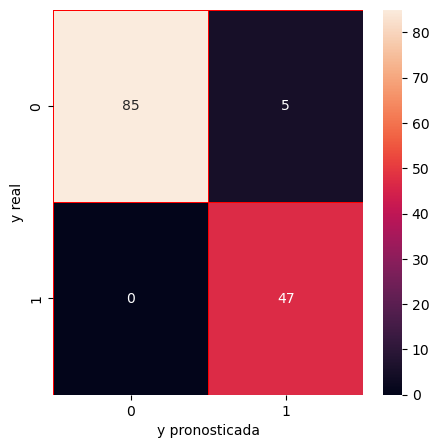

In [62]:
# Visualización de matriz de confusión

import seaborn as sns
f, ax=plt.subplots(figsize=(5,5)) #figsize literalmente aumenta o disminuye el tamaño del gráfico

sns.heatmap(cm,annot=True, linewidths=.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y pronosticada")
plt.ylabel("y real")
plt.show()

# Intepretación estadísticas de desempeño

In [68]:
from sklearn.metrics import classification_report
cnf_matrix=  confusion_matrix(y_test, yhat, labels=[0,1])
print( classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# determinación de niveles de precisión (precision)

la precisión (precision)= Porcentaje de predicciones correctas relativas al total de predicciones

    .El total se calcula por columna
    .Se contesta a la pregunta: ¿Qué porcentaje de las veces que hacemos un pronóstico de cierto tipo éste es correcto?

In [73]:
PrecisiónBenigno= cm[0,0]/(cm[1,0]+cm[0,0])
PrecisiónBenigno

1.0

In [75]:
PrecisiónMaligno= cm[1,1]/(cm[1,1]+cm[0,1])
PrecisiónMaligno

0.9038461538461539

# Determinación de niveles de recuperación (recall)

La recuperación (Recall)= Porcentaje de predicciones corretas realtivas al total de valores reales

    .El total se calcula por renglón
    .Se contesta a la pregunta: ¿Qué porcentaje de las veces que se tiene un valor es de identificarlo?

In [80]:
recallBenigno= cm[0,0]/(cm[0,0]+cm[0,1]) #cuando un tumor es benigno, se va a identificar un 94% de las veces
recallBenigno

0.9444444444444444

In [82]:
recallMaligno= cm[1,1]/(cm[1,1]+cm[1,0])
recallMaligno

1.0

# Determinación del score F1

F1 Score= media armónica ponderada de la precisión y la recuperación. Cuanto más se acerque a 1, mejor será el modelo

    * F1 Score= 2*(Precision*Recall)/ (Precision+ Recall)

In [86]:
F1Benigno= 2*(PrecisiónBenigno* recallBenigno)/(PrecisiónBenigno+ recallBenigno)
F1Benigno

0.9714285714285714

In [88]:
F1Maligno= 2*(PrecisiónMaligno* recallMaligno)/(PrecisiónMaligno+ recallMaligno)
F1Maligno

0.9494949494949495

# Determinación de soportes

Soportes=Número de observaciones que pertenecen en forma real a cada clase posible (Total por renglón)

In [91]:
SoporteBenigno= cm[0,0]+cm[0,1]
SoporteBenigno

90

In [93]:
SoporteMaligno= cm[1,0]+cm[1,1]
SoporteMaligno

47

# Determinación de precisión global(Accuracy)

Accuracy= Porcentaje de predicciones correctas

In [98]:
Correctos= cm[0,0]+cm[1,1]
Incorrectos= cm[1,0]+cm[0,1]
PrecisiónGlobal= Correctos/ (Correctos+Incorrectos)
PrecisiónGlobal

0.9635036496350365

# Promedios simples por indicador (Macro Average)

Promedio simples por Precisión, Recuperación y F1Score

In [103]:
MacroAvgPrecisión= (PrecisiónBenigno+ PrecisiónMaligno)/2
MacroAvgPrecisión

0.9519230769230769

In [105]:
MacroAvgRecuperación= (recallBenigno+ recallMaligno)/2
MacroAvgRecuperación

0.9722222222222222

In [107]:
MacroAvgF1= (F1Benigno+ F1Maligno)/2
MacroAvgF1

0.9604617604617605

# Promedios ponderados por indicador (Weighted Average)

Promedios ponderados de acuerdo a soportes por indicador

In [113]:
PesoBenigno= SoporteBenigno/(SoporteMaligno+SoporteBenigno)
PesoMaligno=SoporteMaligno/(SoporteMaligno+SoporteBenigno)

In [115]:
WAvgPrecisión= PrecisiónBenigno*PesoBenigno+ PrecisiónMaligno*PesoMaligno
WAvgPrecisión

0.967012914093206

In [117]:
WAvgRecuperación= recallBenigno*PesoBenigno+ recallMaligno*PesoMaligno
WAvgRecuperación

0.9635036496350364

In [119]:
WAvgF1= F1Benigno*PesoBenigno+ F1Maligno*PesoMaligno
WAvgF1

0.9639038982104675

# Prueba de SVM con Kernel lineal

In [126]:
clf= svm.SVC(kernel="linear")
clf.fit(x_train, y_train)

yhat= clf.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred= clf.predict(x)
cm= confusion_matrix(y_test, yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [128]:
from sklearn.metrics import classification_report
cnf_matrix=  confusion_matrix(y_test, yhat, labels=[0,1])
print( classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# Prueba de SVM con Kernel polinomial

In [134]:
clf= svm.SVC(kernel="poly")
clf.fit(x_train, y_train)

yhat= clf.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred= clf.predict(x)
cm= confusion_matrix(y_test, yhat)
cm

array([[86,  4],
       [ 0, 47]], dtype=int64)

In [136]:
from sklearn.metrics import classification_report
cnf_matrix=  confusion_matrix(y_test, yhat, labels=[0,1])
print( classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        90
           1       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



# Prueba de SVM con Kernel sigmoid

In [140]:
clf= svm.SVC(kernel="sigmoid")
clf.fit(x_train, y_train)

yhat= clf.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred= clf.predict(x)
cm= confusion_matrix(y_test, yhat)
cm

array([[54, 36],
       [47,  0]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report
cnf_matrix=  confusion_matrix(y_test, yhat, labels=[0,1])
print( classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.53      0.60      0.57        90
           1       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

